In [17]:
import pandas as pd
import numpy as np

human_data = pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


K-mer funtion for DNA sequencing 

In [18]:
def get_kmer(sequence,size):
    return [sequence[x:x+size].lower() for x in range((len(sequence) - size) + 1)]

In [19]:
human_data['dna_patterns'] = human_data['sequence'].apply(lambda x:get_kmer(x,6))
human_data.drop('sequence',axis = 1,inplace=True)
human_data.head()

,class,dna_patterns
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [26]:
l = list(human_data['dna_patterns'])
for item in range(len(l)):
    l[item] = ' '.join(l[item])
y_data = human_data.iloc[:,0]

In [30]:
print(l[0])
y_data

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

0       4
1       4
2       3
3       3
4       3
       ..
4375    0
4376    6
4377    6
4378    6
4379    6
Name: class, Length: 4380, dtype: int64

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
X = CountVectorizer(ngram_range=(4,4)).fit_transform(l)
X.shape

(4380, 232414)

In [36]:
import matplotlib.pyplot as plt


<AxesSubplot:>

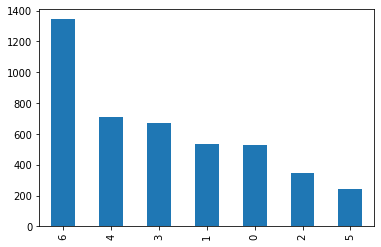

In [40]:
human_data['class'].value_counts().plot.bar()

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_data,random_state=45,train_size=0.2)


In [44]:
print(X_train.shape)
print(X_test.shape)

(876, 232414)
(3504, 232414)


In [57]:
from sklearn.naive_bayes import MultinomialNB
import pickle
classifier = MultinomialNB(alpha=0.1).fit(X_train,y_train)
pickle.dump(classifier,open('DNA_Classifier.pkl.dat','wb'))

In [58]:
predicted = classifier.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
acc = accuracy_score(y_test,predicted)
precision = precision_score(y_test,predicted,average='weighted')
recall = recall_score(y_test,predicted,average='weighted')
f1_score = f1_score(y_test,predicted,average='weighted')

print(acc,precision,recall,f1_score)

0.8350456621004566 0.8554064277345772 0.8350456621004566 0.839659870715539
